<a href="https://colab.research.google.com/github/victorious07/Clustering_Capstone_Project/blob/main/Netflix_Movies_And_TVShows_Clustering_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

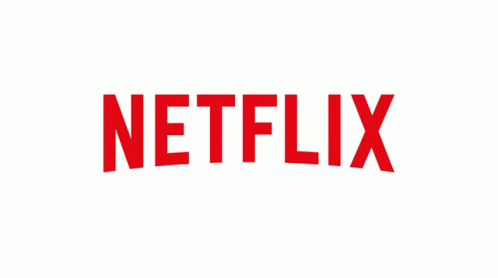

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Libraries**

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_style('darkgrid')
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# **Data Inspection**

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#read csv file
file_path ='/content/drive/MyDrive/Clustering_Capstone_Project/'
netflix_df = pd.read_csv(file_path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
#first five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#last five rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#shape
netflix_df.shape

(7787, 12)

In [ ]:
#info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking duplicates
netflix_df.duplicated().sum()

0

In [ ]:
#checking null values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Columns**

In [ ]:
#columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
col_lst = netflix_df.columns.to_list()

In [ ]:
text=''
for col_name in col_lst:
  if '_' in col_name:
    text +=col_name.title().replace('_','')+' '
  else:
    text +=col_name.title()+' '


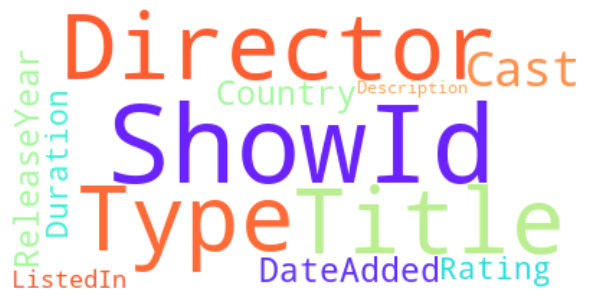

In [ ]:
wordcloud = WordCloud(background_color ='white',colormap='rainbow').generate(text)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

# **Data Cleaning**

**Missing Values and Percentage**

In [ ]:
#calculating no.of missing values
df1 = netflix_df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'no.of_missing'})

#calculating missing percentage
percent_missing = netflix_df.isnull().sum() * 100 / len(netflix_df)
df2 = percent_missing.reset_index().rename(columns={'index':'column_name', 0:'missing_percentage'}).round(2)

#merging dataframes on column_name
missing_value_df = df1.merge(df2,on='column_name')

In [ ]:
missing_value_df

,column_name,no.of_missing,missing_percentage
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,2389,30.68
4,cast,718,9.22
5,country,507,6.51
6,date_added,10,0.13
7,release_year,0,0.00
8,rating,7,0.09
9,duration,0,0.00


**Observations:**
* **director** column has highest NaN values 30.7% data is missing
* **cast** column has 9% NaN values
* **country , date_added , rating** this columns also containing missing values

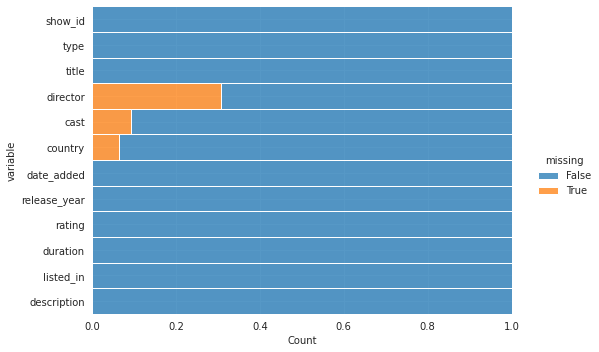

In [ ]:
#plt.figure(figsize=(12,10))
sns.displot(
    data=netflix_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.50
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

* So from above bar graph its clear that **director** and **cast** contains large number of null values.

In [ ]:
#most repeating country
netflix_df.country.mode()

0    United States
dtype: object

In [ ]:
#most repeating rating
netflix_df.rating.mode()

0    TV-MA
dtype: object

In [ ]:
#dropping irrelevant columns
#netflix_df.drop(['director','cast'],axis=1, inplace=True)

In [ ]:
#Replacing missing values in 'director' column with value 'unknown'
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
netflix_df['country']= netflix_df['country'].fillna(netflix_df['country'].mode()[0])

#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Dropping the null values in 'date_added'
netflix_df = netflix_df[netflix_df['date_added'].notna()]

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


# **Exploratory Data Analysis**

***Where possible, I'll use the Netflix brand colours***

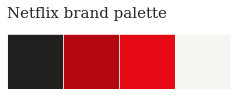

In [ ]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

**Netflix Content by Type Category**

In [ ]:
netflix_df.type.value_counts().reset_index().rename(columns={'index':'Type','type':'Count'})

,Type,Count
0,Movie,5377
1,TV Show,2400


Text(0.5, 0, 'Show Type')

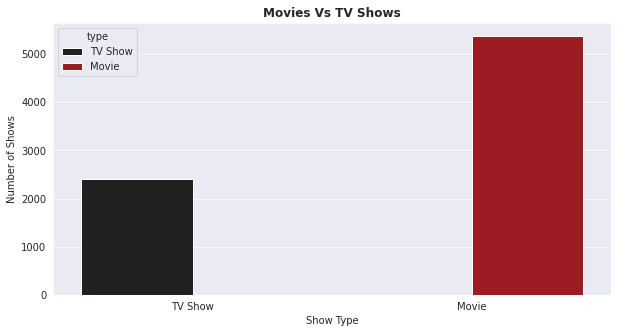

In [ ]:
#bar plot for type of shows
plt.figure(figsize=(10,5))
sns.countplot(x = 'type',hue='type',data=netflix_df,palette=['#221f1f', '#b20710'])
plt.title("Movies Vs TV Shows",weight="bold")
plt.ylabel('Number of Shows')
plt.xlabel('Show Type')

In [ ]:
#visualization
x = netflix_df['type'].value_counts().reset_index()
colors = ['#221f1f', '#b20710']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu,hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)


**Observations :**

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 69% movies and 31% TV shows on Netflix.

**Movie and TV Shows added over time**

In [ ]:
#move and tv shows added overtimes
movie_tvshow_added = netflix_df.loc[(netflix_df['type'] == 'Movie') | (netflix_df['type'] == 'TV Show'),['type','date_added']]
movie_tvshow_added['date_added'] = movie_tvshow_added['date_added'].apply(lambda x : x[-4:])
movie_tvshow_added.head()

,type,date_added
0,TV Show,2020
1,Movie,2016
2,Movie,2018
3,Movie,2017
4,Movie,2020


Text(0.5, 1.0, 'Movies and TV Shows added over time')

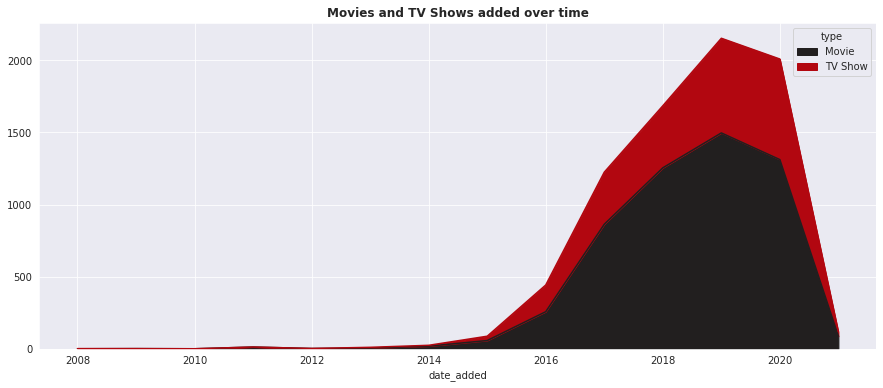

In [ ]:
#visualization
pd.crosstab(movie_tvshow_added.date_added, movie_tvshow_added.type).plot(kind='area',figsize=(15,6),color = ['#221f1f', '#b20710'])
plt.title("Movies and TV Shows added over time",weight="bold")

**Observations:**

* We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

* It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
* Netflix peak global content amount was in 2019.

* It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
* Movies have increased much more dramatically
than TV shows.

**Number of Movies/TV Shows released yearly**

In [ ]:
#move and tv shows release year
movie_tvshow_release_year = netflix_df.loc[(netflix_df['type'] == 'Movie') | (netflix_df['type'] == 'TV Show'),['type','release_year']]
movie_tvshow_release_year['release_year'] = movie_tvshow_release_year['release_year'].apply(lambda x : str(x))
movie_tvshow_release_year.head()

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008


Text(0.5, 1.0, 'Movies and TV Shows released year')

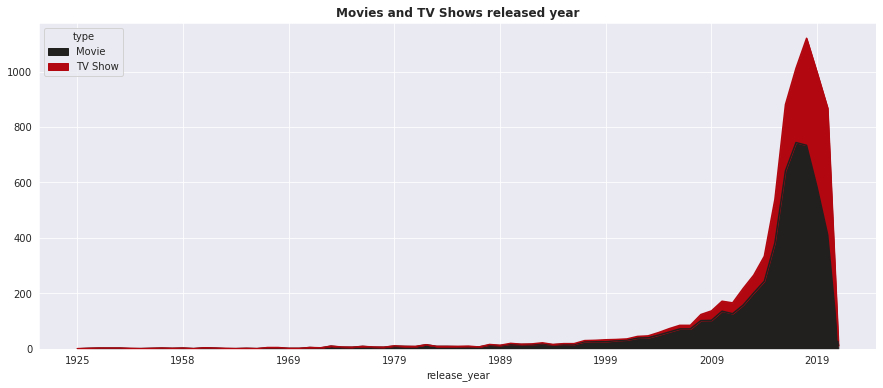

In [ ]:
#visualization
pd.crosstab(movie_tvshow_release_year.release_year, movie_tvshow_release_year.type).plot(kind='area',figsize=(15,6),color = ['#221f1f', '#b20710'])
plt.title("Movies and TV Shows released year",weight="bold")

In [ ]:
release_year_count = netflix_df['release_year'].value_counts().reset_index().rename(columns={'index':'release_year','release_year':'count'}).head(15)
release_year_count['release_year'] = release_year_count['release_year'].apply(lambda x : str(x))

In [ ]:
fig = px.funnel(release_year_count, x='count', y='release_year')
fig.show()

**Observations:**<br>
* As we see plot before 2000, movies and tv shows are released very less number and things begin to pick up from 2000 and then there is a rapid increase from 2014.
* In 2018 maximum number of movies and tvshows are released.
* In the above area plot it is clearly seen that number of movie released more than TV shows.
* After 2019  movies and tvshows are released very less,likely due to the COVID-19 pandemic.

**Top ten countries on Netflix**

Text(0, 0.5, 'Count')

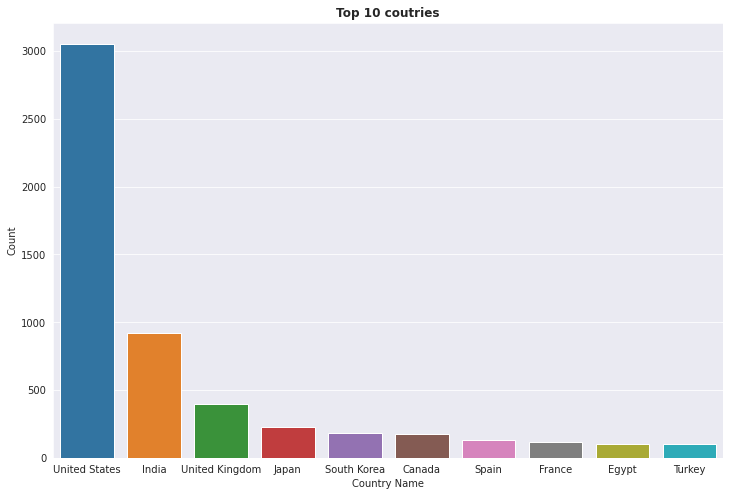

In [ ]:
#Top 10 countries on netflix
plt.figure(figsize=(12,8))
sns.countplot(x =netflix_df['country'], order=netflix_df['country'].value_counts().index[:10])
plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Country Name')
plt.ylabel('Count')

 **Top ten countries movie and TV Show split**

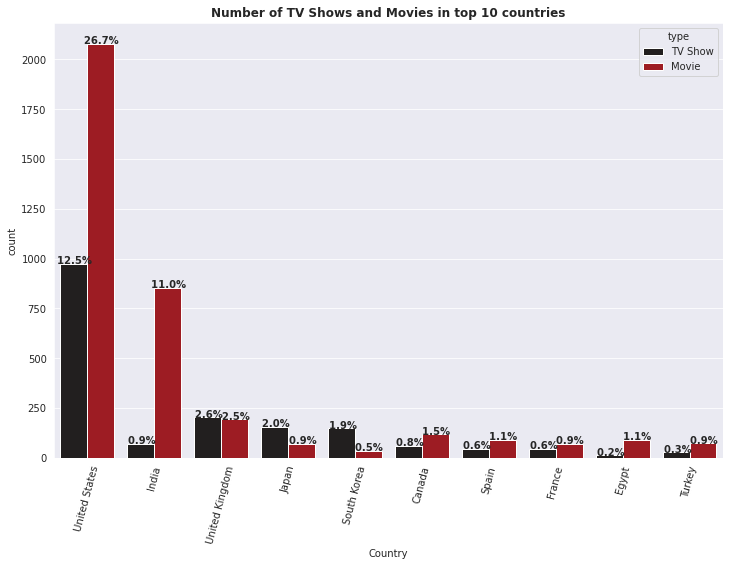

In [ ]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
plt.figure(figsize=(12,8))
ax=sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:10],palette=['#221f1f', '#b20710'])
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")

for p in ax.patches:                                        
    percentage = '{:.1f}%{}'.format(100 * p.get_height()/len(netflix_df),' '*7)     #percentage
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',fontweight="bold")  
plt.show()

* Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite

**Distributions of Rating**

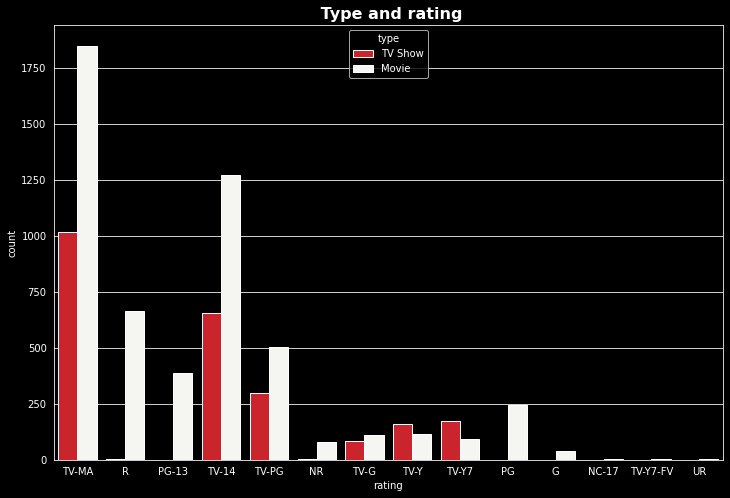

In [ ]:
#rating
with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8))
  sns.countplot(x='rating',hue='type',data=netflix_df,palette=['#e50914','#f5f5f1'])
  plt.title(' Type and rating',size='16',fontweight="bold")
  plt.style.context('dark_background')
  plt.show()

**Obervations:**
* We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14
* Most of the contents got ratings like:
  * TV-MA (For Mature Audiences)
  * TV-14 ( May be unsuitable for children under 14 )
  * TV-PG ( Parental Guidance Suggested  )
  * NR ( Not Rated )

**What age groups are content created for?**

In [ ]:
#compare the rating and the age group
netflix_df['age_group'] = netflix_df['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
netflix_df['age_group'] = netflix_df['age_group'].map(MR_age)

In [ ]:
#movie age group
movie_age_groups = netflix_df.query('type == "Movie"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

#Tv show age group
tvshow_age_groups = netflix_df.query('type == "TV Show"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

In [ ]:
colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f']

fig = px.pie(labels=movie_age_groups['age_group'],values = movie_age_groups['content'],title='Movies',names = movie_age_groups['age_group'], width = 550, height = 550,hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)
fig.show()


fig2 = px.pie(labels=tvshow_age_groups['age_group'],values = tvshow_age_groups['content'],title='TV Shows',names = tvshow_age_groups['age_group'], width = 550, height = 550,hole=0.4)
fig2.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)
fig2.show()

**Observations:**

* In Movies and TV shows mostly contents are in Adults and Young Adults age group.
* Very less contents for kids age group.

**Target ages proportion of total content by country**

In [ ]:
# Helper column for plots
netflix_df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])

# Reducing name length
netflix_df['first_country'].replace('United States', 'USA', inplace=True)
netflix_df['first_country'].replace('United Kingdom', 'UK',inplace=True)

In [ ]:
#grouping the first country
data = netflix_df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

netflix_heatmap = netflix_df.loc[netflix_df['first_country'].isin(data)]
netflix_heatmap = pd.crosstab(netflix_heatmap['first_country'], netflix_heatmap['age_group'],normalize = "index").T
netflix_heatmap

first_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,UK,USA
age_group,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


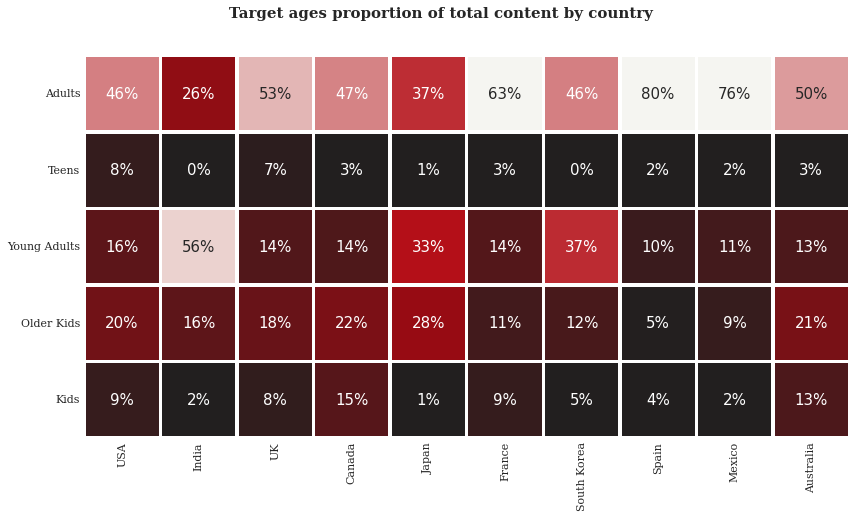

In [ ]:
# Plotting the heatmap
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'South Korea', 'Spain','Mexico','Australia']
age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(netflix_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Observations:**
* It is also interesting to see parallels between culturally comparable nations - the USA and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

* Also, Mexico and Spain have similar content on Netflix for different age groups.

**Content added by Month**

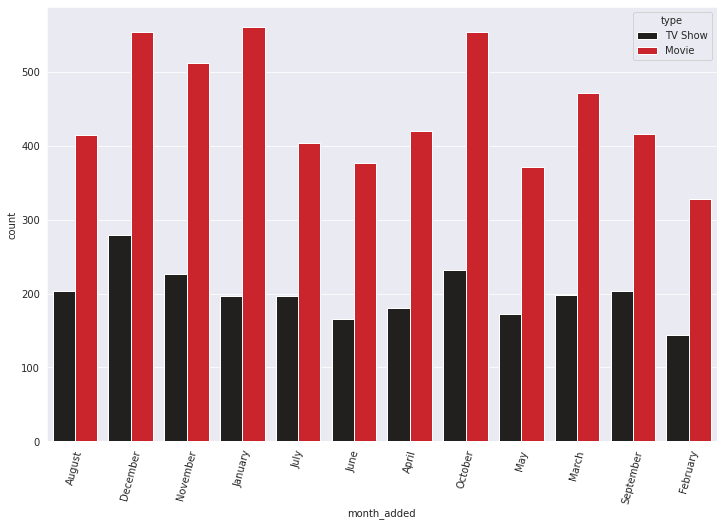

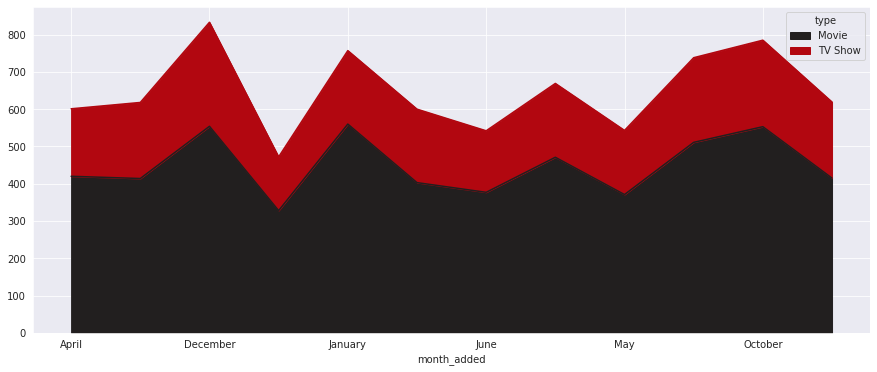

In [ ]:
#month added
movie_tvshow_added = netflix_df[['type','date_added']]
movie_tvshow_added['month_added'] = movie_tvshow_added['date_added'].apply(lambda x : x.split()[0])
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=movie_tvshow_added,hue='type',palette=['#221f1f', '#e50914'])
plt.xticks(rotation=75)
pd.crosstab(movie_tvshow_added.month_added, movie_tvshow_added.type).plot(kind='area',figsize=(15,6),color = ['#221f1f', '#b20710'])

**Observations:**
* The end & beginnings of each year seem to be Netflix's preference for adding content.
* December & January are definitely the best months for new content.
* December has the highest number of contents followed by october and january reason could be December is the holiday season and it also has Christmas, so there is high possibility that most of the contents upload in this month.
* February is the worst.


**Genres on Netflix**

In [ ]:
netflix_df['Listed_in'] = netflix_df['listed_in'].apply(lambda x : x.split(','))               #splitting into list

In [ ]:
genres_lst = []
for i in netflix_df['Listed_in']:                                                              #list of genres
  genres_lst +=i                                                                     

for i in range(len(genres_lst)): 
  genres_lst[i] = genres_lst[i].strip()                    # strip will remove whitespace from the beginning and end of a string                                                        

genres_dict = {}
for genres in  genres_lst:                                                                     #calculating frequency of genres
  if genres in genres_dict:
    genres_dict[genres] +=1
  else:
    genres_dict[genres] = 1

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1],reverse=True))          #sorting dict by values 

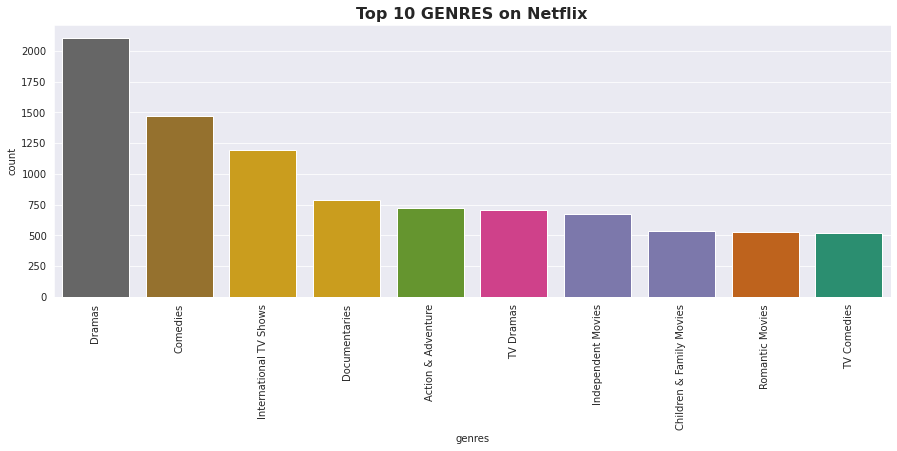

In [ ]:
#top 10 genres on netflix
df_genre_count = pd.DataFrame(genres_dict.values(),genres_dict.keys()).reset_index().rename(columns={'index':'genres', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genres',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

* Drama is the most popular genre followed by comedy.

**In the visualization above, we see the following ranking:**

* **Dramas**
* **Comedies**
* **International Tv shows**
* **Documentaries**
* **Action & Adventure**
* **....**

In [ ]:
#creating a column for no.of categories
netflix_df['no_of_category'] = netflix_df['Listed_in'] .apply(lambda x : len(x))

In [ ]:
netflix_df[['listed_in','no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


In [ ]:
#printing unique values
netflix_df.no_of_category.unique()

array([3, 2, 1])

In [ ]:
#total value count of new category
netflix_df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

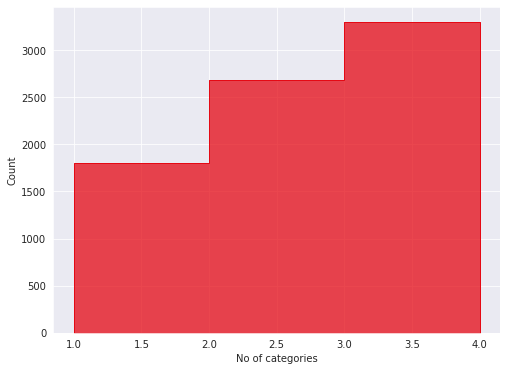

In [ ]:
#Histogram of no_of_category and bins the values
plt.figure(figsize = (8,6))
sns.histplot(data=netflix_df,x='no_of_category',bins=[1,2,3,4],color=['#e50914'],element="step")
plt.xlabel("No of categories")
plt.ylabel("Count")

* So from above graph and table we can see that there are 3 unique categories and their count values and we bin the values for better clearity.

**Top actors on Netflix**

In [ ]:
netflix_df['cast'] = netflix_df['cast'].apply(lambda x : x.split(','))                               #splitting into list

In [ ]:
cast_lst = []
for i in netflix_df['cast']:                                                              #list of actors
  cast_lst +=i                                                                     

for i in range(len(cast_lst)): 
  cast_lst[i] = cast_lst[i].strip()                                # strip will remove whitespace from the beginning and end of a string                                                        

cast_dict = {}
for actor in cast_lst:                                                                     #calculating frequency of actors
  if actor in cast_dict:
    cast_dict[actor] +=1
  else:
    cast_dict[actor] = 1

cast_dict = dict(sorted(cast_dict.items(), key=lambda item: item[1],reverse=True))          #sorting dict by values 

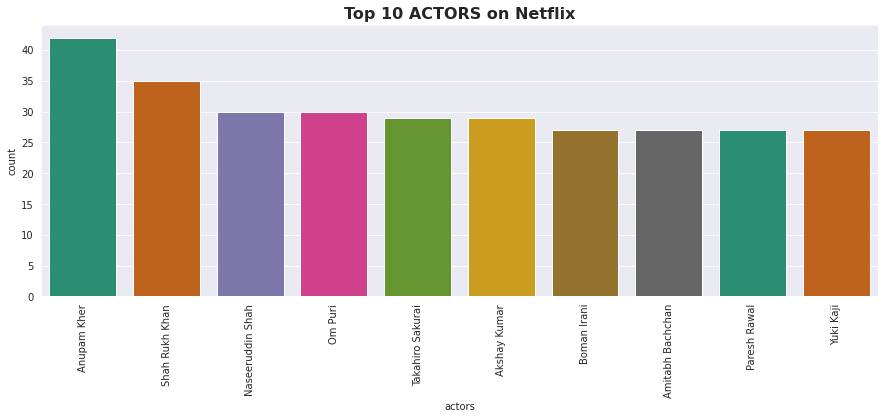

In [ ]:
#top 10 actors on netflix
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().rename(columns={'index':'actors', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='actors',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

* Anupam Kher Have the most number of films on Netflix.

**Movie Duration distribution**

In [ ]:
movie_duration = netflix_df.loc[netflix_df['type'] == 'Movie',['type','duration']]               #filter movie and their length
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))      #converting string into integer

Text(0.5, 1.0, 'Movie Duration')

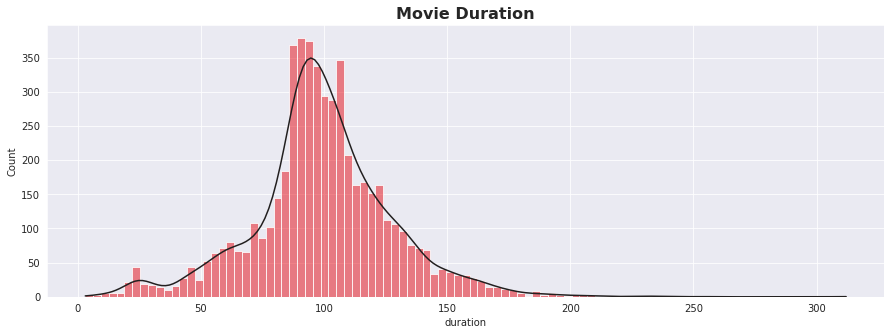

In [ ]:
#movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")

**Observations:**
* Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.
* Most content are about 70 to 120 min duration for movies.

**TV Show Seasons distribution**

In [ ]:
tvshow_seasons = netflix_df.loc[netflix_df['type'] == 'TV Show',['type','duration']]                #filter tvshow and their seasons
tvshow_seasons['duration'] = tvshow_seasons['duration'].apply(lambda x : int(x.split()[0]))            #converting string into integer

In [ ]:
tvshow_seasons['duration'].value_counts().reset_index().rename(columns={'index':'seasons','duration':'count'})

,seasons,count
0,1,1608
1,2,378
2,3,183
3,4,86
4,5,57
5,6,30
6,7,19
7,8,18
8,9,8
9,10,5


Text(0.5, 0, 'Seasons')

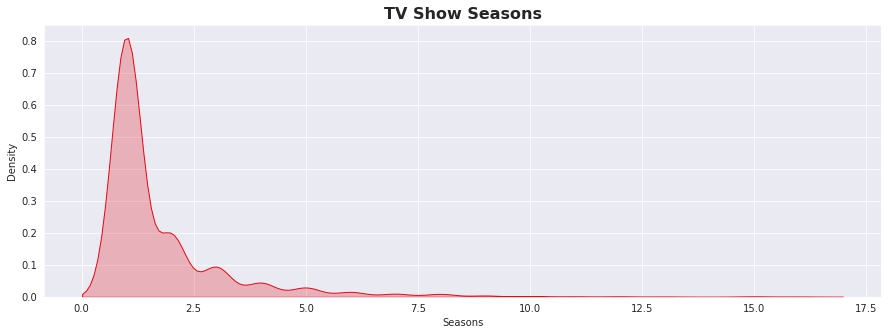

In [ ]:
#TV show seasons distribution
plt.figure(figsize=(15,5))
ax = sns.kdeplot(x='duration',data=tvshow_seasons,color="#e50914",shade=True)
# ax = sns.histplot(x='duration',data=tvshow_seasons,kde=True,color="#e50914")
# ax.lines[0].set_color('#221f1f')
plt.title("TV Show Seasons",size='16',fontweight="bold")
plt.xlabel('Seasons')

**Observation:**
* From above we see that Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

**Top Directors**

In [ ]:
#creating copy for plot
direc=netflix_df.copy()
#removing unknown 
direc=direc[netflix_df['director']!='unknown']

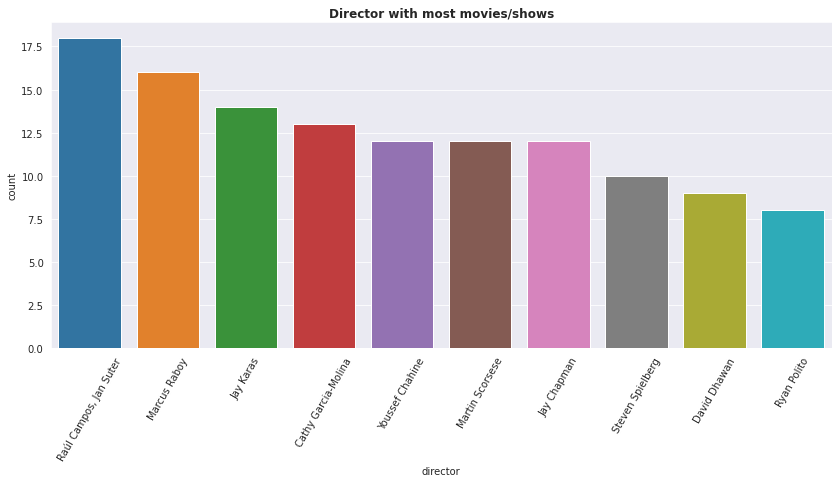

In [ ]:
plt.figure(figsize = (14,6))
sns.countplot(x='director',data=direc,order=direc.director.value_counts().head(10).index)
plt.title('Director with most movies/shows',fontweight="bold")
plt.xticks(rotation = 60)
plt.show()

* Raul Campos and Jan Sulter collectively have the most content on Netflix.



**Content in India**

In [ ]:
#first 25 content in india
content_in_india = netflix_df.loc[(netflix_df['country']=='India') & (netflix_df['director']!='unknown') ,['country','type','director',
                                                                                        'title','duration','release_year']].iloc[:25]

In [ ]:
#visualization
import plotly.express as px
fig = px.treemap(content_in_india,path=['country','director'],color='director',
                 hover_data=['title','duration','type','release_year'],color_continuous_scale='Purples')
fig.show()

**Release_year**

In [ ]:
#to show unique values
netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
#to show the data type
type(netflix_df['release_year'][0])

numpy.int64

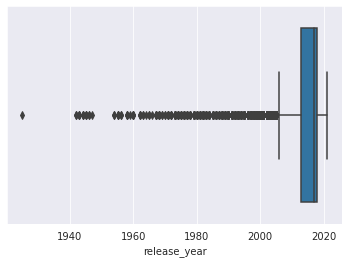

In [ ]:
#box plot graph to show the outliers on release_year column
sns.boxplot(netflix_df.release_year)

* As we have seen earlier, **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why here it's showing those values*(release_year less than 2009)* as outliers.

In [ ]:
#checking interquartile range(IQR)
release_year_Q1 = netflix_df.release_year.quantile(0.25)
release_year_Q3 = netflix_df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* Here its clear that we don't have have any release_year which is greater than 2018.

In [ ]:
#Treating outliers
release_year_outliers = netflix_df[(netflix_df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( netflix_df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]  

In [ ]:
# 15 percentile value is 2009
netflix_df["release_year"] = np.where(netflix_df["release_year"] <2009, netflix_df.release_year.mean(),netflix_df['release_year'])

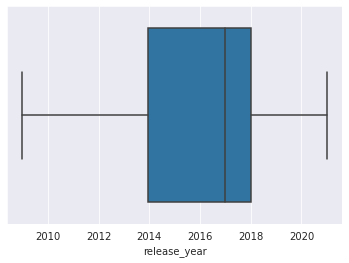

In [ ]:
#Data visualization of 'release_year' using Boxplot
sns.boxplot(netflix_df.release_year)

**Lastly, we can view a wordcloud to get an overview of Netflix titles**

In [ ]:
#title string
text = str(list(netflix_df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

In [ ]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

mask = np.array(Image.open('/content/drive/MyDrive/Clustering_Capstone_Project/netflix_logo.png'))

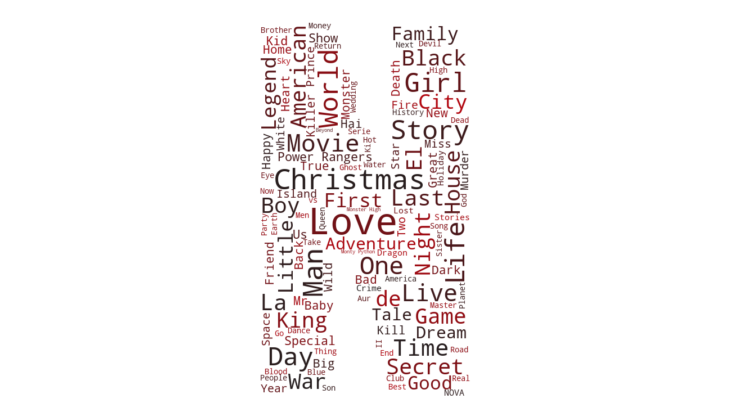

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = 'white', width = 500,  height = 200,colormap=cmap, 
                      max_words = 120,mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()                      

**Observations:**

* It seems like words like "**Love**", "**Man**", "**World**", "**Story**" , "**Christmas**" are very common in titles.

* I have suprised to see "Christmas" ocuured so many time .
The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.

# **Natural Language Processing(NLP)**
NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.


**1. Analysis on "description"**

In [ ]:
#discription category of 1st row
netflix_df.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* **Removing punctuations**

In [ ]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
#removing punctuation from discription column
netflix_df['description'] = netflix_df['description'].apply(remove_punctuation)
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,1,Mexico,"[Dramas, International Movies]",2


* **Downloading nltk**

In [ ]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* **Removing stopwords**

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
#print number of stopwords
print("Number of stopwords in english : ", len(sw))
print('-'*50)
# displaying the stopwords
print('STOP WORDS: ',*sw)

Number of stopwords in english :  179
--------------------------------------------------
STOP WORDS:  i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't we

In [ ]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
#removing stopwords from discription
netflix_df['description'] = netflix_df['description'].apply( remove_stopwords )
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,1,Mexico,"[Dramas, International Movies]",2


Now all the **punctutations** and **stopwords** are removed from **discription** column.

 * **SnowballStemmer**<br>
 It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP).

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#Stemming for description
netflix_df['description'] = netflix_df['description'].apply( Apply_stemming )
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,Adults,1,Mexico,"[Dramas, International Movies]",2


* **Tf-idf Vectorizer**

  * Term Frequency (TF) - How many times a particular word appears in a single document.
  * Inverse Document Frequency (IDF) - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}. This takes care of words which are present rarely across the corpus.

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary = dict(dictionary)
print(dictionary)

{'futur': 5120, 'elit': 4104, 'inhabit': 6479, 'island': 6648, 'paradis': 9343, 'far': 4577, 'crowd': 3135, 'slum': 11667, 'get': 5273, 'one': 9068, 'chanc': 2358, 'join': 6830, 'save': 11024, 'squalor': 11975, 'devast': 3534, 'earthquak': 3994, 'hit': 6028, 'mexico': 8135, 'citi': 2565, 'trap': 12960, 'survivor': 12363, 'walk': 13678, 'life': 7419, 'wait': 13666, 'rescu': 10542, 'tri': 12989, 'desper': 3506, 'stay': 12057, 'aliv': 632, 'armi': 972, 'recruit': 10386, 'found': 4957, 'dead': 3330, 'fellow': 4667, 'soldier': 11765, 'forc': 4910, 'confront': 2855, 'terrifi': 12633, 'secret': 11154, 'that': 12664, 'haunt': 5804, 'jungl': 6901, 'train': 12940, 'camp': 2132, 'postapocalypt': 9818, 'world': 13996, 'ragdol': 10205, 'robot': 10735, 'hide': 5947, 'fear': 4636, 'danger': 3276, 'machin': 7697, 'extermin': 4487, 'brave': 1844, 'newcom': 8727, 'group': 5564, 'brilliant': 1899, 'student': 12206, 'becom': 1405, 'cardcount': 2189, 'expert': 4456, 'intent': 6541, 'swindl': 12402, 'millio

In [ ]:
# Lists to store the vocab and counts
# vocab = []
# count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
# for key, value in dictionary:
#     vocab.append(key)
#     count_of_vocab.append(value)

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
#top15 occured vocab
top15_most_occurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_occurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_word_count = top15_most_occurred_vocab['count'].values
top15_most_occurred_word_count

array([14240, 14239, 14238, 14237, 14236, 14235, 14234, 14233, 14232,
       14231, 14230, 14229, 14228, 14227, 14226])

<BarContainer object of 15 artists>

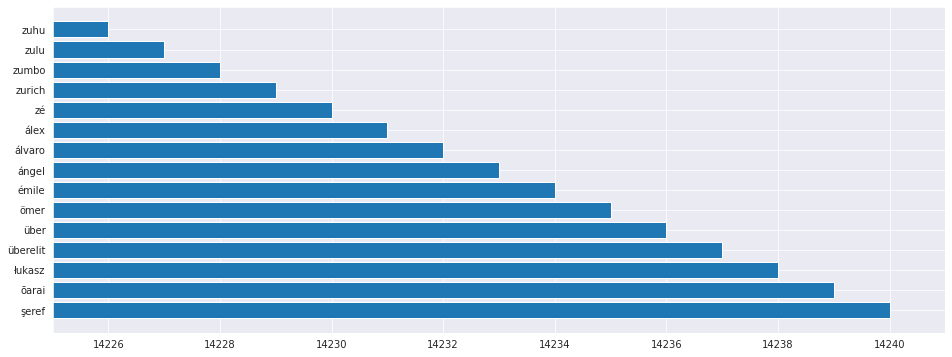

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words ,top15_most_occurred_word_count )

**Adding a new column length which will contain length of description**

In [ ]:
#creating new column name length
netflix_df['Length(description)'] = netflix_df['description'].apply(lambda x: len(x))
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,Adults,1,Mexico,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,Adults,1,Singapore,"[Horror Movies, International Movies]",2,102


In [ ]:
#print 1st row content from discription 
netflix_df.description[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

**2. Analysis on "listed_in"**

* **Removing punctuation and stopwords**

In [ ]:
#removing punctuation and stop words
netflix_df['listed_in'] = netflix_df['listed_in'].apply(remove_punctuation)
netflix_df['listed_in'] = netflix_df['listed_in'].apply( remove_stopwords )
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,dramas international movies,devast earthquak hit mexico citi trap survivor...,Adults,1,Mexico,"[Dramas, International Movies]",2,88


 * **SnowballStemmer**

In [ ]:
#Stemming for description
netflix_df['listed_in'] = netflix_df['listed_in'].apply( Apply_stemming )
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Adults,1,Mexico,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011.0,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Adults,1,Singapore,"[Horror Movies, International Movies]",2,102


* **Tf-idf Vectorizer**

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
#print dictionary variable 
dictionary = dict(dictionary)
print(dictionary)

{'intern': 18, 'tv': 39, 'show': 31, 'drama': 11, 'scifi': 29, 'fantasi': 14, 'movi': 22, 'horror': 16, 'action': 0, 'adventur': 1, 'independ': 17, 'mysteri': 24, 'thriller': 38, 'crime': 7, 'docuseri': 10, 'documentari': 9, 'sport': 34, 'comedi': 6, 'anim': 2, 'seri': 30, 'realiti': 26, 'romant': 27, 'scienc': 28, 'natur': 25, 'british': 3, 'korean': 20, 'music': 23, 'lgbtq': 21, 'faith': 12, 'spiritu': 33, 'kid': 19, 'spanishlanguag': 32, 'children': 4, 'famili': 13, 'classic': 5, 'cult': 8, 'standup': 35, 'talk': 36, 'teen': 37, 'featur': 15}


In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming_listed_in = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
#top15 occured vocab
top15_most_occurred_vocab_listed_in = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_occurred_vocab_listed_in_word = top15_most_occurred_vocab_listed_in.Word.values 
top15_most_occurred_vocab_listed_in_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [ ]:
top15_most_occurred_vocab_listed_in_count = top15_most_occurred_vocab_listed_in['count'].values
top15_most_occurred_vocab_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

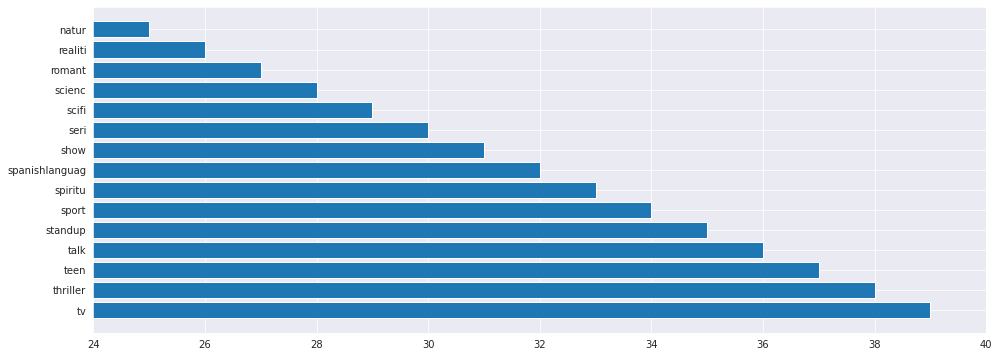

In [ ]:
#bar graph after stemming of listed_in category
plt.figure( figsize = ( 16,6 ))
plt.xlim(24, 40 )
plt.barh(top15_most_occurred_vocab_listed_in_word , top15_most_occurred_vocab_listed_in_count)

**Adding a new column length which will contain length of listed_in**

In [ ]:
#new column for listed_in length
netflix_df['Length(listed-in)'] = netflix_df['listed_in'].apply(lambda x: len(x))
netflix_df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23
